In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_gpu_prices():
    data = pd.read_csv('./Data/gpu_prices/FACT_GPU_PRICE.csv')
    time_data = pd.read_csv('./Data/gpu_prices/DIM_TIME.csv')
    prod_data = pd.read_csv('./Data/gpu_prices/DIM_GPU_PROD.csv')
    region_data = pd.read_csv('./Data/gpu_prices/DIM_REGION.csv')
    prod_data['Memory_Capacity_category'] = prod_data['Memory_Capacity'].apply(lambda x: 'high' if x >= 10 else 'medium' if x >=2 else 'low')
    merged_data = pd.merge(data, time_data, how = 'left', left_on = 'TimeId', right_on = 'Id')
    merged_data = pd.merge(merged_data, prod_data, how = 'left', left_on = 'ProdId', right_on = 'Id')
    merged_data = pd.merge(merged_data, region_data, how = 'left', left_on = 'RegionId', right_on = 'Id')

    country_code_name_map = {
        'au': 'Australia',
        'be': 'Belgium',
        'ca': 'Canada',
        'de': 'Germany',
        'es': 'Spain',
        'fr': 'France',
        'ie': 'Ireland',
        'it': 'Italy',
        'nz': 'New Zealand',
        'uk': 'United Kingdom of Great Britain and Northern Ireland',
        'us': 'United States of America'
    }
    merged_data['Code'] = merged_data['Code'].map(country_code_name_map)
    merged_data = merged_data[merged_data['Code'] != 'New Zealand']
    merged_data['BigMac_index'] = merged_data['Code'].map(bigmac_idx)
    merged_data['ppp_price'] = merged_data['Price_USD'] * (1 + (merged_data['BigMac_index'] / 100.0))
#     fig, ax = plt.subplots(1, 1, figsize = (10, 10))
#     sns.boxplot(x = 'Memory_Capacity_category', y = 'ppp_price', data = merged_data, ax = ax)
#     plt.show()
#     merged_data = merged_data.groupby(['Memory_Capacity_category'])['ppp_price'].aggregate('median').reset_index(drop = False)
#     print(merged_data)
    return merged_data

In [4]:
def get_student_age_data():
    data = pd.read_csv('./Data/student_age.csv')
    ug_data = data[data['Course'] == 'UG']
    pg_data = data[data['Course'] == 'PG']
    pg_data = pg_data.assign(Neg_Composition = -pg_data['Composition'])
    return ug_data, pg_data

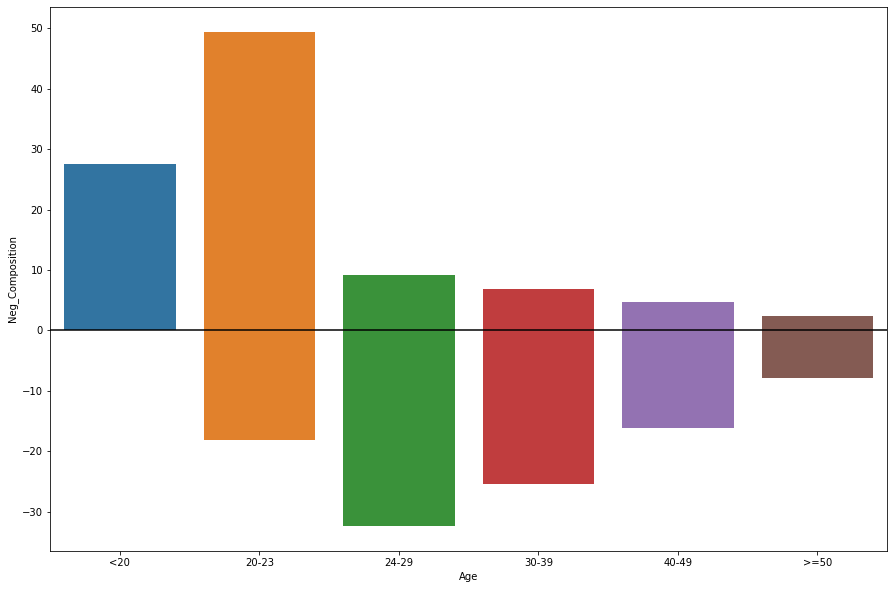

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
sns.barplot(x = 'Age', y = 'Composition', data = ug_data, ax = ax)
sns.barplot(x = 'Age', y = 'Neg_Composition', data = pg_data, ax = ax)
ax.axhline(0, color = 'black')
plt.show()